In [4]:
# YOLOv5 모델 다운로드 및 설치
%cd "C:/project/yolov5-master"
# !git clone https://github.com/ultralytics/yolov5.git
# !pip install -r requirements.txt

C:\project\yolov5-master


In [5]:
# 필요한 라이브러리 import
import torch
from IPython.display import Image, clear_output

C:\project\yolov5-master


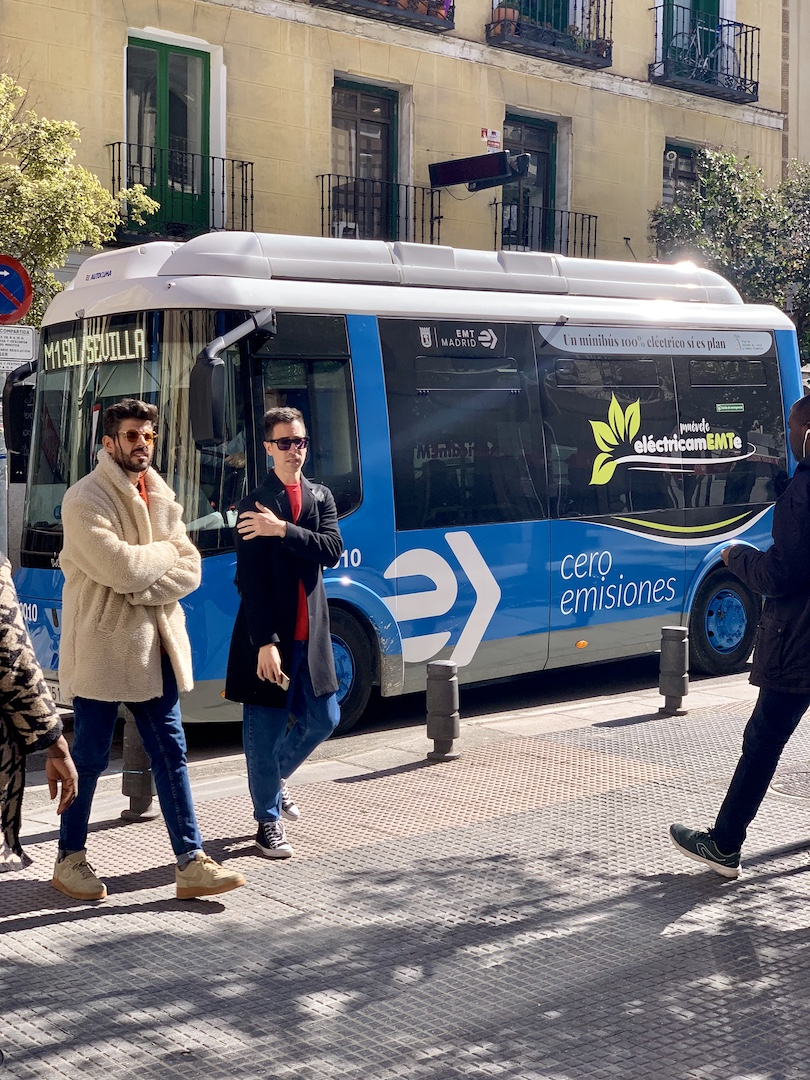

In [8]:
#모델 잘 불러왔는지 확인.
%cd "C:/project/yolov5-master"
Image(filename='data/images/bus.jpg', width=300) 

In [11]:
# yolo5 잘 되는지 확인
%cd "C:/project/yolov5-master"
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/ 

C:\project\yolov5-master


detect: weights=['yolov5s.pt'], source=data/images/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-6-19 Python-3.10.13 torch-2.3.1+cpu CPU


  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  1%|          | 128k/14.1M [00:00<00:54, 270kB/s]
  2%|1         | 256k/14.1M [00:00<00:35, 412kB/s]
  3%|2         | 384k/14.1M [00:00<00:27, 527kB/s]
  4%|3         | 512k/14.1M [00:01<00:22, 625kB/s]
  4%|4         | 640k/14.1M [00:01<00:22, 639kB/s]
  5%|5         | 768k/14.1M [00:01<00:19, 705kB/s]
  6%|6         | 896k/14.1M [00:01<00:18, 770kB/s]
  7%|7         | 1.00M/14.1M [00:01<00:18, 764kB/s]
  8%|7         | 1.12M/14.1M

C:\project\yolov5-master


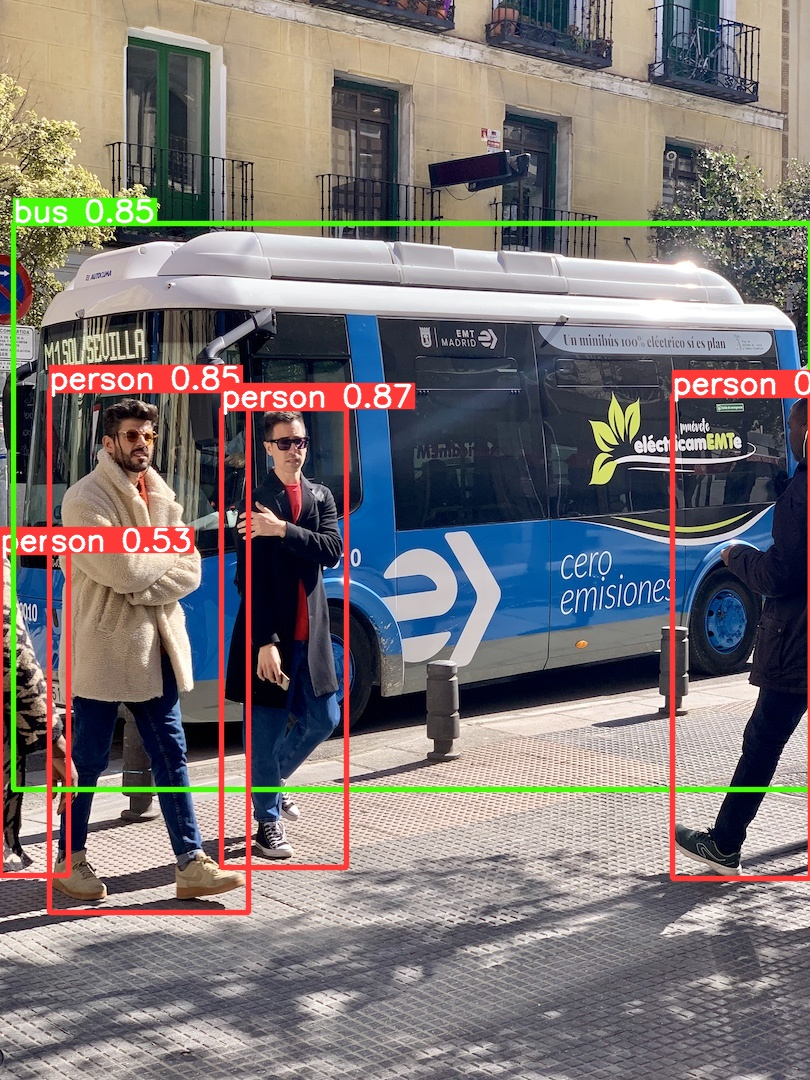

In [12]:
#디텍션 잘 되는지 확인.
%cd "C:/project/yolov5-master"
Image(filename='runs\detect\exp/bus.jpg', width=300) 

In [ ]:
# human_data.yaml 파일 만들기.
# 코코데이타셋을 다운받았습니다.
train: C:\project\cocodata\train\images
val: C:\project\cocodata\val\images

nc: 1
names: ['human']

In [54]:
import os

def find_files_without_class_48(labels_dir):
    files_without_class_48 = []

    # labels_dir 디렉토리 내의 모든 파일을 순회
    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            file_path = os.path.join(labels_dir, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()
                has_class_48 = any(line.startswith('48 ') for line in lines)
                
                if not has_class_48:
                    files_without_class_48.append(filename)

    return files_without_class_48

# 경로 설정
labels_dir = r'C:\project\cocodata\train\labels'

# 클래스 48이 없는 파일명 리스트 생성
files_without_class_48 = find_files_without_class_48(labels_dir)

# 결과 리스트를 출력하는 대신 파일로 저장
with open('files_without_class_48.txt', 'w') as f:
    for filename in files_without_class_48:
        f.write(f"{filename}\n")

print("클래스 48이 없는 파일명을 'files_without_class_48.txt' 파일에 저장했습니다.")

클래스 48이 없는 파일명을 'files_without_class_48.txt' 파일에 저장했습니다.


In [ ]:
import os

def delete_files_from_list(file_list_path, images_dir, labels_dir):
    # 파일 리스트를 읽기
    with open(file_list_path, 'r') as file:
        files_to_delete = [line.strip() for line in file.readlines()]

    for filename in files_to_delete:
        # .txt 확장자를 .jpg로 변경하여 이미지 파일 이름 생성
        image_filename = filename.replace('.txt', '.jpg')
        
        # 파일 경로 생성
        label_file_path = os.path.join(labels_dir, filename)
        image_file_path = os.path.join(images_dir, image_filename)
        
        # 레이블 파일 삭제
        if os.path.exists(label_file_path):
            os.remove(label_file_path)
            print(f"{label_file_path} 파일을 삭제했습니다.")
        else:
            print(f"{label_file_path} 파일을 찾을 수 없습니다.")

        # 이미지 파일 삭제
        if os.path.exists(image_file_path):
            os.remove(image_file_path)
            print(f"{image_file_path} 파일을 삭제했습니다.")
        else:
            print(f"{image_file_path} 파일을 찾을 수 없습니다.")

# 경로 설정
file_list_path = 'files_without_class_48.txt'
images_dir = r'C:\project\cocodata\train\images'
labels_dir = r'C:\project\cocodata\train\labels'

# 파일 삭제 함수 호출
delete_files_from_list(file_list_path, images_dir, labels_dir)


In [56]:
import os

directory = "C:\\project\\cocodata\\train\\labels"

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
        
        new_lines = [line for line in lines if line.split()[0] == "48"]
        new_lines = [line.replace("48", "0", 1) for line in new_lines]
        
        with open(file_path, 'w', encoding='utf-8') as file:
            file.writelines(new_lines)

print("작업이 완료되었습니다.")


작업이 완료되었습니다.


In [ ]:
%%writetemplate C:\project\yolov5-master\data\custom_yolov5s.yaml
# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 1 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [10]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [11]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git

%cd "C:\project\yolov5-master"
!python train.py --img 640 --batch 16 --epochs 3 --data C:/project/cocodata/human_data.yaml --cfg C:/project/cocodata/custom_yolov5s.yaml --weights yolov5s.pt --name cocohuman_result --cache --device 0

C:\project\yolov5-master
